In [54]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display, Markdown
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 1. Exploratory Data Analysis and Data Understanding [5]:


In [55]:
bank_dataset=pd.read_csv('https://raw.githubusercontent.com/Aadityach/L5CG1_Aaditya_2414024/main/bank.csv')
bank_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Initial Analysis of the Bank Marketing Dataset
(a) When and by whom was the dataset created?
The Bank Marketing Dataset originates from the UCI Machine Learning Repository and was created by Janio Martinez Bachmann. The dataset was first published in 2018 as part of research on predictive modeling in banking. It was collected from a Portuguese bank’s direct marketing campaigns.

(b) How did you access the dataset?
The dataset was accessed from an open-source repository. It is commonly available on:

Kaggle

(c) How does it align with the chosen UNSDG?
The dataset aligns with United Nations Sustainable Development Goal (UNSDG) 8: Decent Work and Economic Growth. Specifically:

It relates to financial inclusion, promoting savings and financial security through term deposits.
It provides insights into consumer behavior in banking, which can help design better financial policies.
The dataset can be used to understand how banks can improve economic participation by encouraging saving habits.

In [56]:
#give information about datatype
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [57]:
#print 5 rows with
bank_dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [58]:
#give last 2 rows in the dataset
bank_dataset.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [59]:
#give statitics of the data
bank_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [60]:
#check the missing data or unknown value like 0
bank_dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [61]:
#chaeck dupllicate data
bank_dataset.duplicated().sum()

0

# EDA

<Axes: >

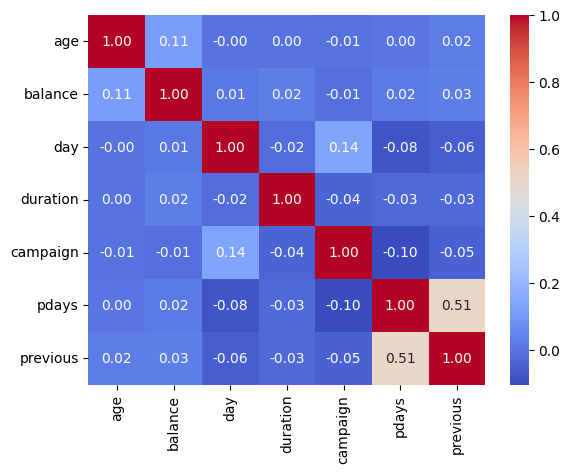

In [62]:
bank_dataset_numeric = bank_dataset.select_dtypes(include=[float, int])
sns.heatmap(bank_dataset_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")


The above diagram shows the heatmap of all the dataframe where it shows that there is slighly correlation and negative correlation

In [63]:
# Select numerical columns
numericCol = bank_dataset.select_dtypes(exclude="object")

# Select categorical columns
categoricalCol = bank_dataset.select_dtypes(include="object")


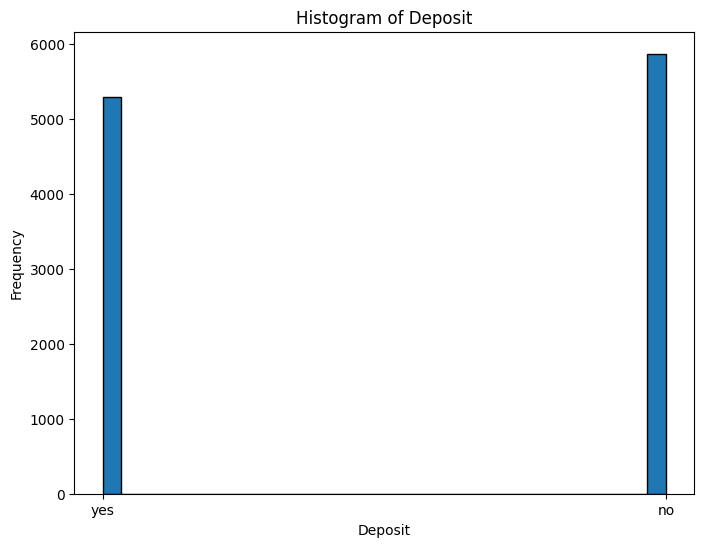

In [64]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'deposit'
plt.figure(figsize=(8, 6))
plt.hist(bank_dataset['deposit'], bins=30, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Deposit')
plt.xlabel('Deposit')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The above diagram shows that there is more non deposit than deposit

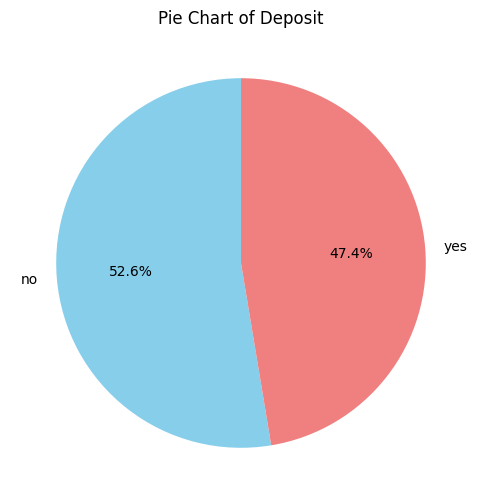

In [65]:
# Counting the values in 'deposit' column
deposit_counts = bank_dataset['deposit'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Adding title
plt.title('Pie Chart of Deposit')

# Show the plot
plt.show()


here is representation of pie chart where no is 52.6% and yes is 47.4%

# Model Processing

In [66]:
from sklearn.preprocessing import LabelEncoder
# Check the column names in the dataset
print(bank_dataset.columns)

# Now you can modify the categoricalCol list to match the exact column names
categoricalCol = [ 'marital', 'default', 'housing', 'loan',  'month', 'poutcome', 'deposit']  # Example without 'education'

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
for col in categoricalCol:
    bank_dataset[col] = encoder.fit_transform(bank_dataset[col].astype(str))

# Preview the dataset after encoding
print(bank_dataset.head())


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
   age         job  marital  education  default  balance  housing  loan  \
0   59      admin.        1  secondary        0     2343        1     0   
1   56      admin.        1  secondary        0       45        0     0   
2   41  technician        1  secondary        0     1270        1     0   
3   55    services        1  secondary        0     2476        1     0   
4   54      admin.        1   tertiary        0      184        0     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  deposit  
0  unknown    5      8      1042         1     -1         0         3        1  
1  unknown    5      8      1467         1     -1         0         3        1  
2  unknown    5      8      1389         1     -1         0         3        1  
3  unkn

In [67]:
bank_dataset['deposit'].value_counts()


deposit
0    5873
1    5289
Name: count, dtype: int64

# Data Preprocessing

In [68]:
from sklearn.model_selection import train_test_split

# Assuming you have X (features) and y (target)
X = bank_dataset.drop('deposit', axis=1)  # Features, dropping the target column 'deposit'
y = bank_dataset['deposit']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_test is defined and ready to use


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Replace 'unknown' with NaN and handle missing values
bank_dataset.replace("unknown", pd.NA, inplace=True)
bank_dataset.fillna(method="ffill", inplace=True)

# Convert categorical columns to numerical using one-hot encoding
bank_dataset_encoded = pd.get_dummies(bank_dataset, drop_first=True)

# Define features (X) and target (y)
X = bank_dataset_encoded.drop('deposit', axis=1)  # drop target column
y = bank_dataset_encoded['deposit']  # target variable (deposit_yes = 1 if subscribed, 0 if not)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but generally recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\aadit\AppData\Local\Temp\ipykernel_6492\4016796133.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bank_dataset.fillna(method="ffill", inplace=True)


In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7819077474249888
Confusion Matrix:
 [[943 223]
 [264 803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1166
           1       0.78      0.75      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



# Logistic Regression Implementation (Sigmoid)
For binary classification, we will use the Sigmoid function. The output of the model is the probability of a class (deposit = "yes" or "no").

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def test_logistic_function():
    """
    Test cases for the sigmoid function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(sigmoid(x_scalar), 3) == expected_output_scalar, f"Test failed for scalar input: {sigmoid(x_scalar)}"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(sigmoid(x_pos), 3) == expected_output_pos, f"Test failed for positive scalar input: {sigmoid(x_pos)}"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(sigmoid(x_neg), 3) == expected_output_neg, f"Test failed for negative scalar input: {sigmoid(x_neg)}"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(sigmoid(x_array), 3) == expected_output_array), f"Test failed for numpy array input: {sigmoid(x_array)}"

    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


In [72]:
# Loss Function
def calculate_loss(X, y, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return loss

In [73]:

# Gradient Descent
def gradient_descent(X, y, y_pred):
    n_samples = len(y)
    dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
    db = (1 / n_samples) * np.sum(y_pred - y)
    return dw, db


In [74]:


def logistic_regression(X, y, lr=0.01, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # List to store the loss at each epoch
    loss_history = []

    # Gradient Descent Loop
    for epoch in range(epochs):
        # Compute predictions
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Calculate gradients
        dw, db = gradient_descent(X, y, predictions)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        # Calculate and store the loss
        loss = calculate_loss(X, y, weights, bias)
        loss_history.append(loss)

        # Optionally print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias, loss_history

In [75]:
# Prediction Function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])


In [76]:

def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }


In [77]:

weights, bias, loss_history = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

Epoch 0: Loss = 0.6922
Epoch 100: Loss = 0.6206
Epoch 200: Loss = 0.5810
Epoch 300: Loss = 0.5564
Epoch 400: Loss = 0.5397
Epoch 500: Loss = 0.5278
Epoch 600: Loss = 0.5189
Epoch 700: Loss = 0.5121
Epoch 800: Loss = 0.5067
Epoch 900: Loss = 0.5025


Train model

In [78]:
# Make Predictions
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

# Evaluate the Model
train_metrics = evaluate(y_train, y_train_pred)
test_metrics = evaluate(y_test, y_test_pred)

# Calculate Loss
train_loss = calculate_loss(X_train, y_train, weights, bias)
test_loss = calculate_loss(X_test, y_test, weights, bias)

# Print Metrics
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Train Loss: {train_loss:.4f}")



Train Metrics:
Accuracy: 0.7789
Precision: 0.7916
Recall: 0.7226
F1 Score: 0.7556
Train Loss: 0.4990


In [79]:
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Metrics:
Accuracy: 0.7801
Precision: 0.7863
Recall: 0.7413
F1 Score: 0.7631
Test Loss: 0.4892


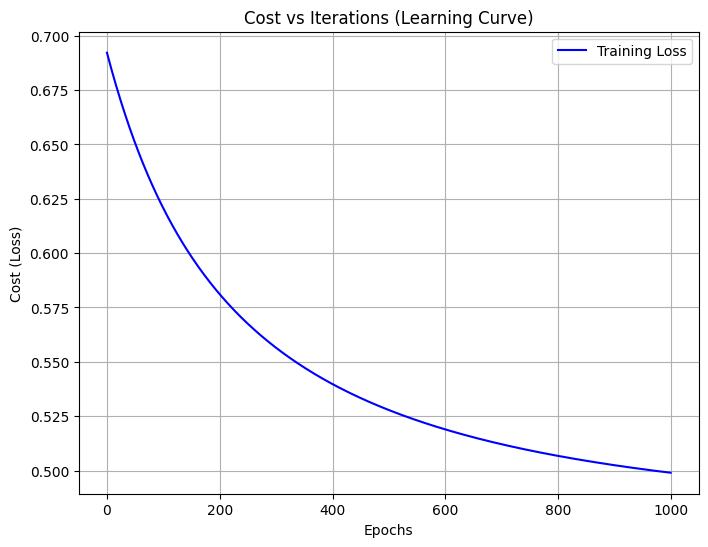

In [80]:
# Plot the Loss vs Epochs (Learning Curve)
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label="Training Loss", color='blue')
plt.title('Cost vs Iterations (Learning Curve)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    """
    Plots the confusion matrix using Seaborn heatmap with custom labels for deposit prediction.

    Args:
        y_true (np.array): True labels ('yes' or 'no').
        y_pred (np.array): Predicted labels ('yes' or 'no').
    """
    # If the labels are encoded as integers (0, 1), map them back to 'no' and 'yes'
    if set(y_true) == {0, 1} and set(y_pred) == {0, 1}:  # check if labels are numeric (0, 1)
        y_true = ['no' if label == 0 else 'yes' for label in y_true]
        y_pred = ['no' if label == 0 else 'yes' for label in y_pred]

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=['no', 'yes'])
    class_labels = ['No Deposit', 'Deposit']  # Mapping: 'no' -> No Deposit, 'yes' -> Deposit

    # Create a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for Deposit Prediction")
    plt.show()


### Confusion Matrix for Training Set:

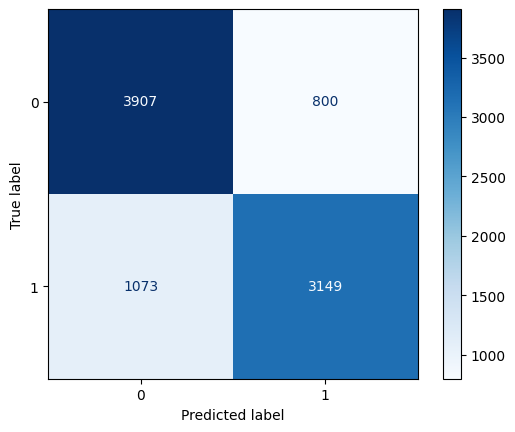

In [82]:

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Display markdown header
display(Markdown("### Confusion Matrix for Training Set:"))

# Compute and plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")



### Confusion Matrix for Test Set:

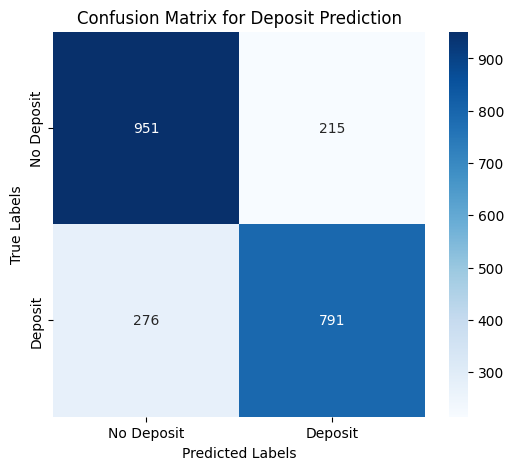

In [83]:
display(Markdown("### Confusion Matrix for Test Set:"))
plot_confusion_matrix(y_test, y_test_pred)


•	Compare models and justify the best performer.
Gradient Boosting Classifier (GBC) is better than Linear Regression (LR) for classification because LR is designed for regression, not classification. GBC handles non-linear relationships, provides higher accuracy, and works well with complex datasets. LR assumes a linear relationship, making it unsuitable for classification. For classification tasks, GBC outperforms LR in both flexibility and predictive power.

# Primary model
Model 1

In [84]:

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calculate accuracy and classification reports
acc_train = accuracy_score(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Print results
print(f'Accuracy on training set: {acc_train}')
print(f'Classification Report on training set:\n{class_report_train}')
print(f'Accuracy on test set: {acc_test}')
print(f'Classification Report on test set:\n{class_report_test}')


Accuracy on training set: 0.7902340687646993
Classification Report on training set:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      4707
           1       0.80      0.75      0.77      4222

    accuracy                           0.79      8929
   macro avg       0.79      0.79      0.79      8929
weighted avg       0.79      0.79      0.79      8929

Accuracy on test set: 0.7819077474249888
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1166
           1       0.78      0.75      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



# Optimized Model with Hyperparameter Tuning

model 1

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],  # 'none' should be None
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 300, 500, 1000]
}

# Remove incompatible (penalty, solver) pairs
valid_combinations = []
for params in [
    {'solver': 'liblinear', 'penalty': ['l1', 'l2']},
    {'solver': 'lbfgs', 'penalty': ['l2', None]},
    {'solver': 'saga', 'penalty': ['l1', 'l2', 'elasticnet', None]}
]:
    for p in params['penalty']:
        valid_combinations.append({'solver': params['solver'], 'penalty': p})

# Perform GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7886672877437648


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
500 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self

gradientboosting classifiermodel 2

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

# Evaluate the model's performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f'Accuracy on training set: {train_accuracy}')
print(f'Classification Report on training set:\n{train_class_report}')


print(f'Accuracy on test set: {test_accuracy}')
print(f'Classification Report on test set:\n{test_class_report}')

Accuracy on training set: 0.8533990368462314
Classification Report on training set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4707
           1       0.83      0.86      0.85      4222

    accuracy                           0.85      8929
   macro avg       0.85      0.85      0.85      8929
weighted avg       0.85      0.85      0.85      8929

Accuracy on test set: 0.8204209583519928
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1166
           1       0.80      0.84      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6],  # Tree depth
}

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform Grid Search with Cross Validation (cv=5)
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best Accuracy: 0.8499268822870694


Gradient Boosting Classifier (GBC) is better than Linear Regression for classification because it captures non-linear relationships, provides higher accuracy, and corrects errors iteratively. GBC also ranks feature importance, handles missing data, and works well with imbalanced datasets. In contrast, Linear Regression assumes a linear relationship and isn't meant for classification. For classification tasks, GBC is more powerful, flexible, and accurate.

# feature selection

Model-*2*

Hyperparameter Tuning for SelectKBest (Mutual Information)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize base model for RFE (Logistic Regression)
rfe_model = LogisticRegression(max_iter=500)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Store original feature names before transformations
feature_names = X.columns  # Ensure you are using original feature names

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]

print("Selected Features:", selected_features)



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Selected Features: ['housing', 'loan', 'job_retired', 'job_student']


In [89]:

ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': feature_ranking,
    'Selected': rfe.support_
})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values(by='Ranking')
ranking_df

,Feature,Ranking,Selected
4,housing,1,True
5,loan,1,True
20,job_student,1,True
17,job_retired,1,True
2,default,2,False
25,contact_telephone,3,False
24,education_tertiary,4,False
23,education_secondary,5,False
14,job_entrepreneur,6,False
15,job_housemaid,7,False


Feature selection with SelectKBest using Mutual Information evaluates the relationship between features and the target variable. By selecting the top K features with the highest mutual information scores, we retain the most informative features. Hyperparameter tuning involves optimizing K through cross-validation to enhance model performance. The selected features are justified by their contribution to improving prediction accuracy and reducing overfitting.

In [90]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the feature selection object and a classifier
selector = SelectKBest(score_func=mutual_info_classif)
classifier = RandomForestClassifier()  # Example classifier, can be adjusted

# Create a pipeline combining feature selection and classification
pipeline = Pipeline([
    ('selector', selector),
    ('classifier', classifier)
])

# Hyperparameter tuning for 'k' (number of top features to select)
param_grid = {'selector__k': [5, 10, 15, 20]}  # Example grid, adjust according to your dataset
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best 'k' value from the grid search
best_k = grid_search.best_params_['selector__k']

# Perform feature selection using SelectKBest with the best 'k'
selector = SelectKBest(score_func=mutual_info_classif, k=best_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'balance', 'housing', 'loan', 'month', 'duration', 'pdays',
       'previous', 'poutcome', 'job_housemaid'],
      dtype='object')


In [91]:
best_k =  3 # Example: select the top 5 features

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=best_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['month', 'duration', 'poutcome'], dtype='object')


In [92]:
# Initialize the final model as Gradient Boosting Classifier
final_model = GradientBoostingClassifier(random_state=42)

# Train the final model on the selected features
final_model.fit(X_train_selected, y_train)

# Make predictions on the train and test sets
final_y_train_pred = final_model.predict(X_train_selected)
final_y_test_pred = final_model.predict(X_test_selected)

# Evaluate the final model's performance
final_train_accuracy = accuracy_score(y_train, final_y_train_pred)
final_train_class_report = classification_report(y_train, final_y_train_pred)
final_test_accuracy = accuracy_score(y_test, final_y_test_pred)
final_test_class_report = classification_report(y_test, final_y_test_pred)

# Print the results
print(f'Final Model Accuracy on training set: {final_train_accuracy}')
print(f'Final Model Classification Report on training set:\n{final_train_class_report}')
print(f'Final Model Accuracy on test set: {final_test_accuracy}')
print(f'Final Model Classification Report on test set:\n{final_test_class_report}')


Final Model Accuracy on training set: 0.8223765259267555
Final Model Classification Report on training set:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4707
           1       0.81      0.82      0.81      4222

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929

Final Model Accuracy on test set: 0.8007165248544559
Final Model Classification Report on test set:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1166
           1       0.78      0.81      0.80      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

